In [2]:
#evaluate how well linear regression fits these data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("lungvol.csv")

In [4]:
df.head()

,Unnamed: 0,age,height,sex,IC
0,0,5,110.1,F,0.780
1,1,6,116.0,F,0.887
2,2,7,121.7,F,1.000
3,3,8,127.5,F,1.125
4,4,9,133.5,F,1.263


In [5]:
df = df.drop('Unnamed: 0',axis=1)

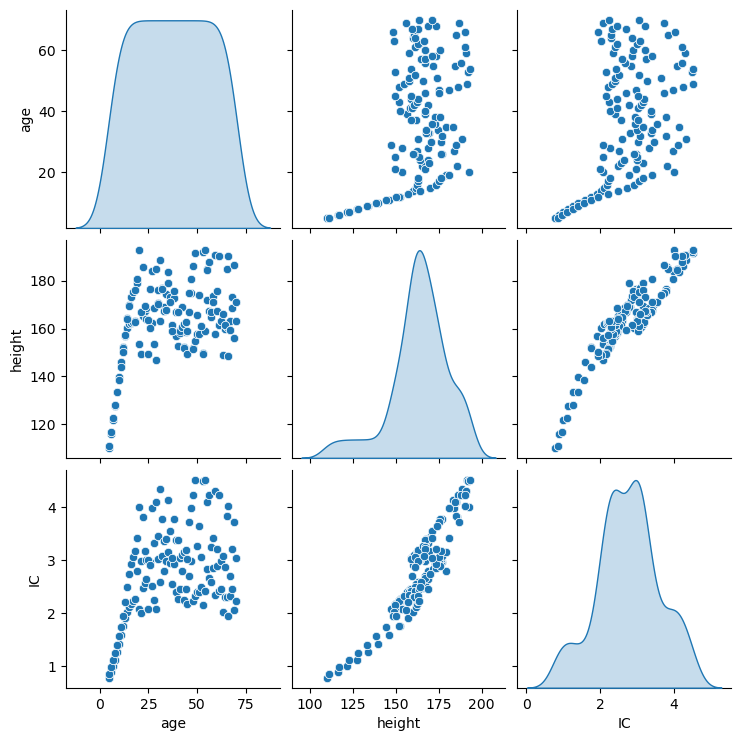

In [6]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [7]:
df = df.drop('sex',axis=1)

In [38]:
y = df['IC']
X = df.drop('IC',axis=1)

In [40]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [106]:
from sklearn.linear_model import LinearRegression

In [108]:
model = LinearRegression()

In [113]:
model.fit(X_train,y_train)

LinearRegression()

In [117]:
test_pred = model.predict(X_test)
#df['test_pred']=test_pred
test_pred;

In [119]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [124]:
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)
RMSE

0.3384876523047805

In [126]:
MSE

0.11457389076280199

In [78]:
df['IC'].mean()

2.7641515151515152

In [80]:
df['residual'] = df['IC'] - df['test_pred']

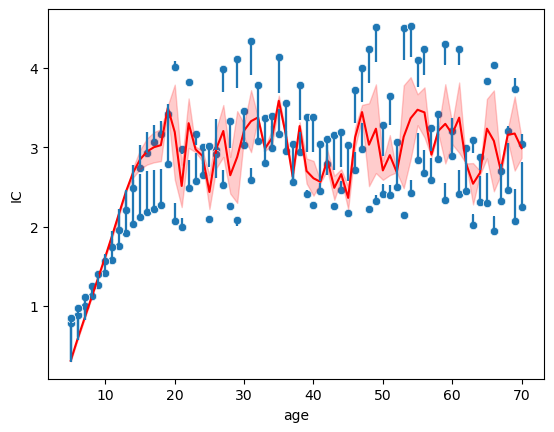

In [88]:
sns.scatterplot(data=df,x='age',y='IC')
sns.lineplot(data=df,x='age',y='test_pred',color='red')
plt.vlines(df['age'],df['IC'],df['IC']-df['residual'])

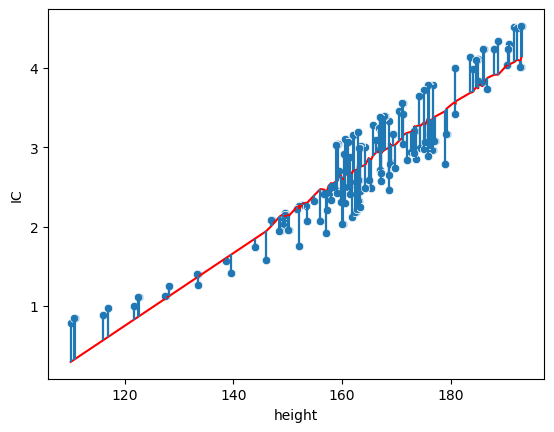

In [86]:
sns.scatterplot(data=df,x='height',y='IC')
sns.lineplot(data=df,x='height',y='test_pred',color='red')
plt.vlines(df['height'],df['IC'],df['IC']-df['residual'])

<Axes: xlabel='residual', ylabel='Density'>

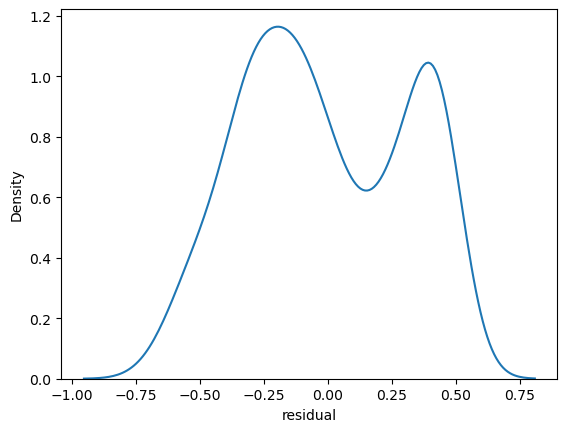

In [91]:
sns.kdeplot(df['residual'])

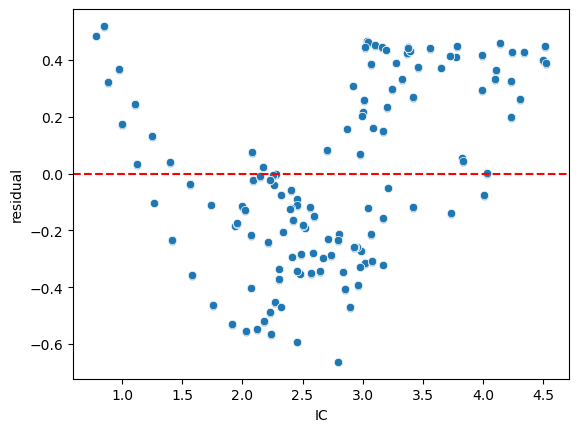

In [94]:
sns.scatterplot(data=df,x='IC',y='residual')
plt.axhline(y=0, color='r', linestyle='--')